In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics

In [4]:
data = pd.read_csv('./data_i.csv')
data.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Bitcash,Cryptocurrency_Bitcoin,Cryptocurrency_Does not have,Cryptocurrency_Etherium,Cryptocurrency_Litecoin,Cryptocurrency_Monero
0,1.575318,-0.700949,-0.804477,-0.909496,0.054551,-0.864733,-0.625504,0.570941,1.236305,1.285332,...,1,0,0,1,0,0,1,0,0,0


# Best Features

In [11]:
Feature_Selection = ['p1_d', 'p2_d','min_d','#sp','#dp','first_sp', 'first_dp', 'second_sp','second_dp']

# Holdout

In [12]:
y = data['Type_mine']
X = data[Feature_Selection]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.3, random_state = 1234)

# KNN

In [28]:
k_vec = np.arange(1,40,2)
vec_train = []
vec_test =[]

for k in k_vec:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    vec_train.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    vec_test.append(metrics.accuracy_score(y_test, y_pred))
v = pd.DataFrame()
v['K'] = k_vec
v['vec_train'] = vec_train
v['vec_test'] = vec_test
display(v)

,K,vec_train,vec_test
0,1,1.000000,0.999296
1,3,0.998793,0.999296
2,5,0.997887,0.998592
3,7,0.997585,0.998592
4,9,0.996076,0.997887
5,11,0.995774,0.997887
6,13,0.995472,0.997183
7,15,0.995171,0.997183
8,17,0.993963,0.996479
9,19,0.995171,0.996479


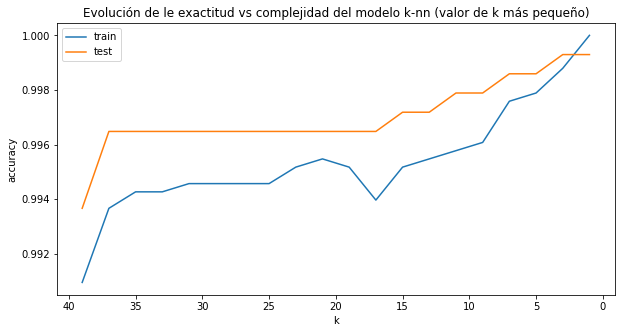

In [29]:
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(k_vec, vec_train)
plt.plot(k_vec, vec_test)
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

In [34]:
k_best = 8

In [35]:
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [37]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Métricas y matriz de confusión

In [40]:
y_test.shape, y_pred.shape

((1420,), (1420,))

([<matplotlib.axis.YTick at 0x208c1a9b6d8>,
 <a list of 2 Text yticklabel objects>)

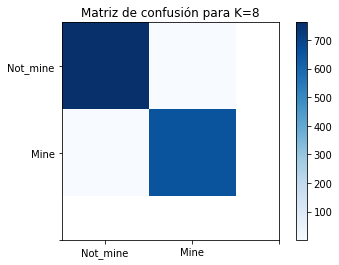

In [54]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.title(f"Matriz de confusión para K={k_best}")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [55]:
churm

array([[762,   1],
       [  1, 656]], dtype=int64)

In [56]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.accuracy_score(y_test, y_pred))

Exactitud:  0.9985915492957746
Kappa:  0.9985915492957746


In [61]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))

VN = np.sum(churm[1:3,1:3])
FP = np.sum(churm[0,1:3])
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))


Precisión     :  0.9984779299847792
Recall        :  0.9984779299847792
Especificidad :  0.9984779299847792
F1-score      :  0.9984779299847792


In [62]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))

VN = np.sum(churm[1:3,1:3])
FP = np.sum(churm[0,1:3])
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))

Precisión     :  0.9986893840104849
Recall        :  0.9986893840104849
Especificidad :  0.9984779299847792
F1-score      :  0.9986893840104849


# Cross Validation Score

In [ ]:
print("Exactitudes: %0.2f (+/- %0.2f)" % (exactitud.mean(), exactitud.std() * 2), exactitud.mean(), exactitud.std())

https://www.analyticslane.com/2018/07/02/gridsearchcv/#:~:text=GridSearchCV%20es%20una%20clase%20disponible,los%20par%C3%A1metros%20de%20un%20modelo.&text=En%20caso%20de%20que%20se,aleatorios%20existe%20el%20m%C3%A9todo%20RandomizedSearchCV.